# Word Embedding Tutorial for IMDB Sentiment Analysis

This notebook demonstrates:
1. **One-hot encoding** - Traditional sparse representation of words
2. **Word embeddings** - Dense vector representation using Keras Embedding layer
3. **Sequence padding** - Making all sequences the same length for neural network input

Word embeddings are crucial for NLP tasks as they capture semantic relationships between words in dense, low-dimensional vectors.

In [1]:
# Import required libraries for word embedding demonstration
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import os

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

In [2]:
# Sample sentences for demonstration
# These sentences contain words related to programming and data science
# We'll use these to show how word embeddings work
sent = [
    "I love programming in Python",
    "Python is great for data science", 
    "I enjoy solving problems with Python",
    "Data science is fascinating",
    "I love learning new technologies",
    "Python is versatile and powerful",
    "I enjoy building machine learning models",
]

print(f"Number of sentences: {len(sent)}")
print("Sample sentences:")
for i, sentence in enumerate(sent, 1):
    print(f"{i}. {sentence}")

Number of sentences: 7
Sample sentences:
1. I love programming in Python
2. Python is great for data science
3. I enjoy solving problems with Python
4. Data science is fascinating
5. I love learning new technologies
6. Python is versatile and powerful
7. I enjoy building machine learning models


In [3]:
sent

['I love programming in Python',
 'Python is great for data science',
 'I enjoy solving problems with Python',
 'Data science is fascinating',
 'I love learning new technologies',
 'Python is versatile and powerful',
 'I enjoy building machine learning models']

In [4]:
# Define vocabulary size for one-hot encoding
# This represents the maximum number of unique words we can handle
# In real applications, this should be set based on your dataset size
voc_size = 10000
print(f"Vocabulary size set to: {voc_size:,} words")

Vocabulary size set to: 10,000 words


In [5]:
# One-hot encoding of sentences
# This converts each word in each sentence to a unique integer
# The one_hot function uses hashing to map words to integers
# Note: This is a simplified approach and may have hash collisions

print("Converting sentences to one-hot encoded format...")
one_hot_repr = [one_hot(words, voc_size) for words in sent]

print(f"Original sentences: {len(sent)}")
print(f"One-hot encoded representations: {len(one_hot_repr)}")
print("\nFirst sentence one-hot encoding:")
print(f"'{sent[0]}' -> {one_hot_repr[0]}")

Converting sentences to one-hot encoded format...
Original sentences: 7
One-hot encoded representations: 7

First sentence one-hot encoding:
'I love programming in Python' -> [5370, 7966, 5996, 2790, 4560]


In [6]:
one_hot_repr

[[5370, 7966, 5996, 2790, 4560],
 [4560, 337, 2730, 6116, 6075, 8014],
 [5370, 5319, 2582, 8800, 2361, 4560],
 [6075, 8014, 337, 1125],
 [5370, 7966, 3225, 6375, 9770],
 [4560, 337, 3273, 933, 1315],
 [5370, 5319, 9755, 9131, 3225, 2898]]

In [7]:
# Enhanced visualization of one-hot encoded representations
def plot_one_hot_enhanced(one_hot_repr, sent):
    """
    Create an enhanced visualization of one-hot encoded sentences
    Shows the distribution of encoded values across sentences
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Scatter plot of one-hot values
    colors = plt.cm.Set3(np.linspace(0, 1, len(one_hot_repr)))
    
    for i, (sentence, color) in enumerate(zip(one_hot_repr, colors)):
        ax1.scatter([i] * len(sentence), sentence, 
                   label=f'Sentence {i+1} ({len(sentence)} words)', 
                   alpha=0.7, s=60, color=color)
    
    ax1.set_title('One-hot Encoded Word Representations', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Sentence Index', fontsize=12)
    ax1.set_ylabel('One-hot Encoded Values', fontsize=12)
    ax1.set_xticks(range(len(one_hot_repr)))
    ax1.set_xticklabels([f'S{i+1}' for i in range(len(one_hot_repr))])
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Sentence length distribution
    lengths = [len(sentence) for sentence in one_hot_repr]
    ax2.bar(range(len(lengths)), lengths, color=colors, alpha=0.7, edgecolor='black')
    ax2.set_title('Word Count per Sentence', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Sentence Index', fontsize=12)
    ax2.set_ylabel('Number of Words', fontsize=12)
    ax2.set_xticks(range(len(lengths)))
    ax2.set_xticklabels([f'S{i+1}' for i in range(len(lengths))])
    
    # Add value labels on bars
    for i, v in enumerate(lengths):
        ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('plots/one_hot_encoding_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print analysis
    print("\\n=== One-Hot Encoding Analysis ===")
    print(f"Total sentences: {len(one_hot_repr)}")
    print(f"Average words per sentence: {np.mean(lengths):.1f}")
    print(f"Min/Max words: {min(lengths)}/{max(lengths)}")
    print(f"Vocabulary size used: {voc_size:,}")
    
    return lengths

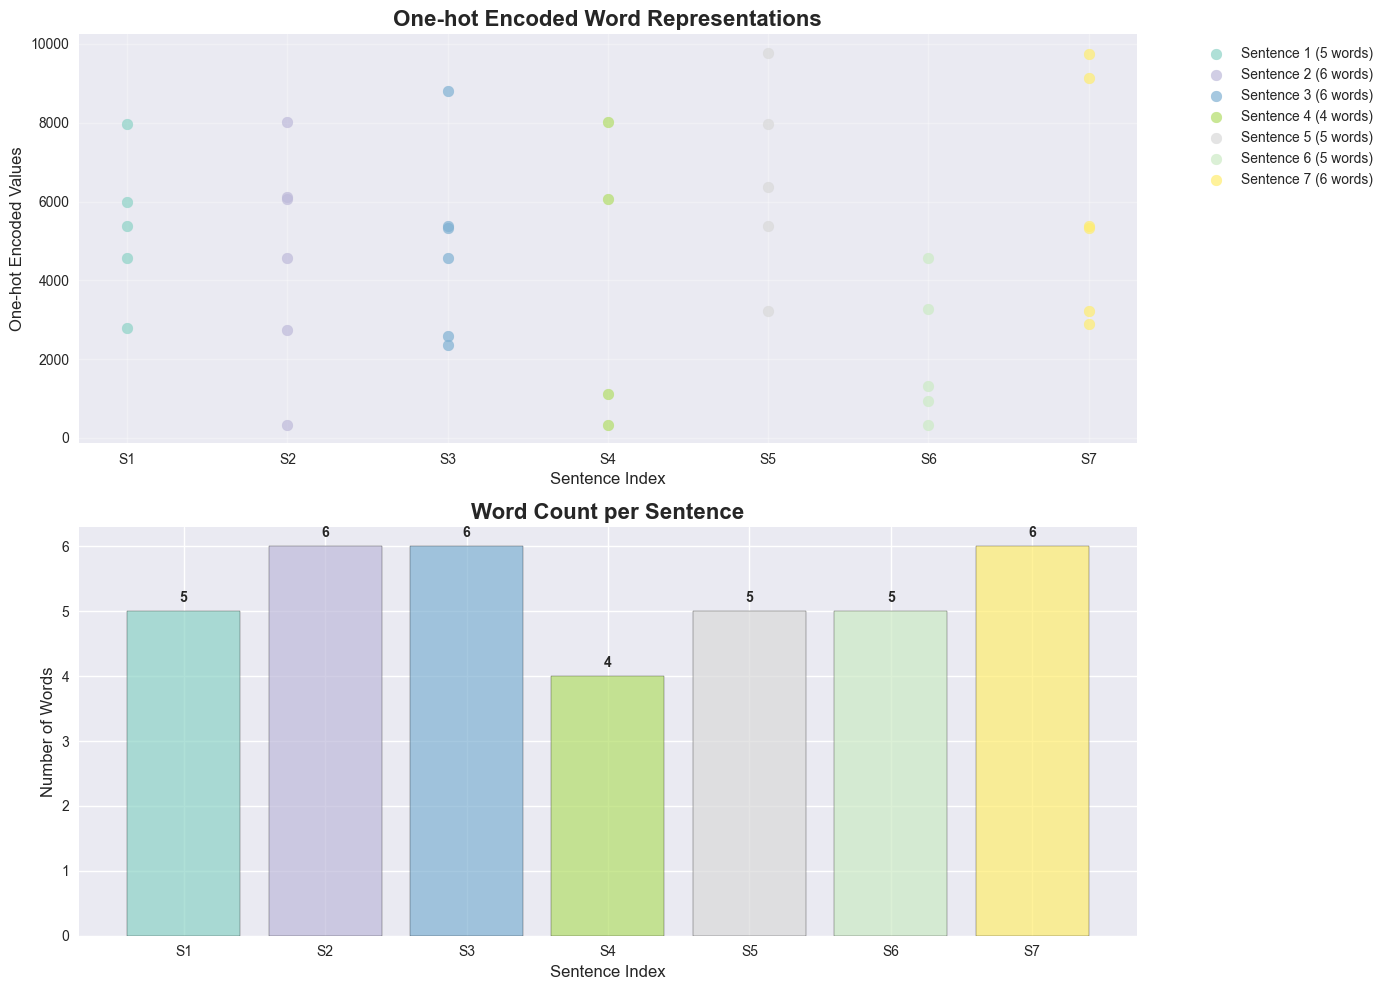

\n=== One-Hot Encoding Analysis ===
Total sentences: 7
Average words per sentence: 5.3
Min/Max words: 4/6
Vocabulary size used: 10,000


In [8]:
# Generate enhanced one-hot encoding visualization
sentence_lengths = plot_one_hot_enhanced(one_hot_repr, sent)

In [9]:
# Transition from one-hot to word embeddings
# Word embeddings provide dense, learnable representations unlike sparse one-hot vectors
# The Embedding layer learns meaningful word relationships during training

print("\\n=== Moving to Word Embeddings ===")
print("Word embeddings solve limitations of one-hot encoding:")
print("✓ Dense representation (lower memory usage)")
print("✓ Learnable parameters (captures semantic relationships)")
print("✓ Fixed-size vectors regardless of vocabulary size")
print("✓ Better generalization for unseen word combinations\\n")

\n=== Moving to Word Embeddings ===
Word embeddings solve limitations of one-hot encoding:
✓ Dense representation (lower memory usage)
✓ Learnable parameters (captures semantic relationships)
✓ Fixed-size vectors regardless of vocabulary size
✓ Better generalization for unseen word combinations\n


In [10]:
# Analyze sentence lengths for padding requirements
# Neural networks require fixed-length inputs, so we need to pad sequences
sent_lengths = [len(sentence) for sentence in one_hot_repr]
max_length = max(sent_lengths)

print("Sentence length analysis:")
print(f"Sentence lengths: {sent_lengths}")
print(f"Maximum length: {max_length} words")
print(f"Average length: {np.mean(sent_lengths):.1f} words")
print(f"We'll pad all sequences to {max_length} words for uniform input size")

Sentence length analysis:
Sentence lengths: [5, 6, 6, 4, 5, 5, 6]
Maximum length: 6 words
Average length: 5.3 words
We'll pad all sequences to 6 words for uniform input size


In [11]:
max_length

6

In [12]:
# Pad sequences to uniform length
# 'pre' padding adds zeros at the beginning of shorter sequences
# This ensures all sequences have the same length for neural network processing
embedded_doc = pad_sequences(one_hot_repr, maxlen=max_length, padding='pre')

print("Sequence padding results:")
print(f"Original shapes: {[len(seq) for seq in one_hot_repr]}")
print(f"Padded shape: {embedded_doc.shape}")
print(f"All sequences now have length: {max_length}")
print("\\nFirst padded sequence:")
print(f"Original: {one_hot_repr[0]}")
print(f"Padded:   {embedded_doc[0]}")

embedded_doc

Sequence padding results:
Original shapes: [5, 6, 6, 4, 5, 5, 6]
Padded shape: (7, 6)
All sequences now have length: 6
\nFirst padded sequence:
Original: [5370, 7966, 5996, 2790, 4560]
Padded:   [   0 5370 7966 5996 2790 4560]


array([[   0, 5370, 7966, 5996, 2790, 4560],
       [4560,  337, 2730, 6116, 6075, 8014],
       [5370, 5319, 2582, 8800, 2361, 4560],
       [   0,    0, 6075, 8014,  337, 1125],
       [   0, 5370, 7966, 3225, 6375, 9770],
       [   0, 4560,  337, 3273,  933, 1315],
       [5370, 5319, 9755, 9131, 3225, 2898]])

In [13]:
# Define embedding dimension
# This determines the size of the dense vector representation for each word
# Higher dimensions can capture more complex relationships but require more memory
dim = 10

print(f"Embedding dimension set to: {dim}")
print(f"Each word will be represented as a {dim}-dimensional vector")
print(f"Total embedding parameters: {voc_size:,} × {dim} = {voc_size * dim:,}")

Embedding dimension set to: 10
Each word will be represented as a 10-dimensional vector
Total embedding parameters: 10,000 × 10 = 100,000


In [14]:
# Create embedding model
# The Embedding layer maps integer indices to dense vectors
# Parameters:
# - voc_size: vocabulary size (input dimension)
# - dim: embedding dimension (output dimension)  
# - input_length: length of input sequences
model = Sequential()
model.add(Embedding(voc_size, dim, input_length=max_length))
model.compile(optimizer='adam', loss='mse')

print("Embedding model created successfully!")
print(f"Input: sequences of length {max_length} with values 0-{voc_size-1}")
print(f"Output: sequences of length {max_length} with {dim}-dimensional vectors")



Embedding model created successfully!
Input: sequences of length 6 with values 0-9999
Output: sequences of length 6 with 10-dimensional vectors

Embedding model created successfully!
Input: sequences of length 6 with values 0-9999
Output: sequences of length 6 with 10-dimensional vectors


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 10)             100000    
                                                                 
Total params: 100000 (390.62 KB)
Trainable params: 100000 (390.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 10)             100000    
                                                                 
Total params: 100000 (390.62 KB)
Trainable params: 100000 (390.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 112ms/step
Embedding generation complete!
Input shape: (7, 6)
Output shape: (7, 6, 10)
Each word is now represented by a 10-dimensional vector\n
Embedding generation complete!
Input shape: (7, 6)
Output shape: (7, 6, 10)
Each word is now represented by a 10-dimensional vector\n


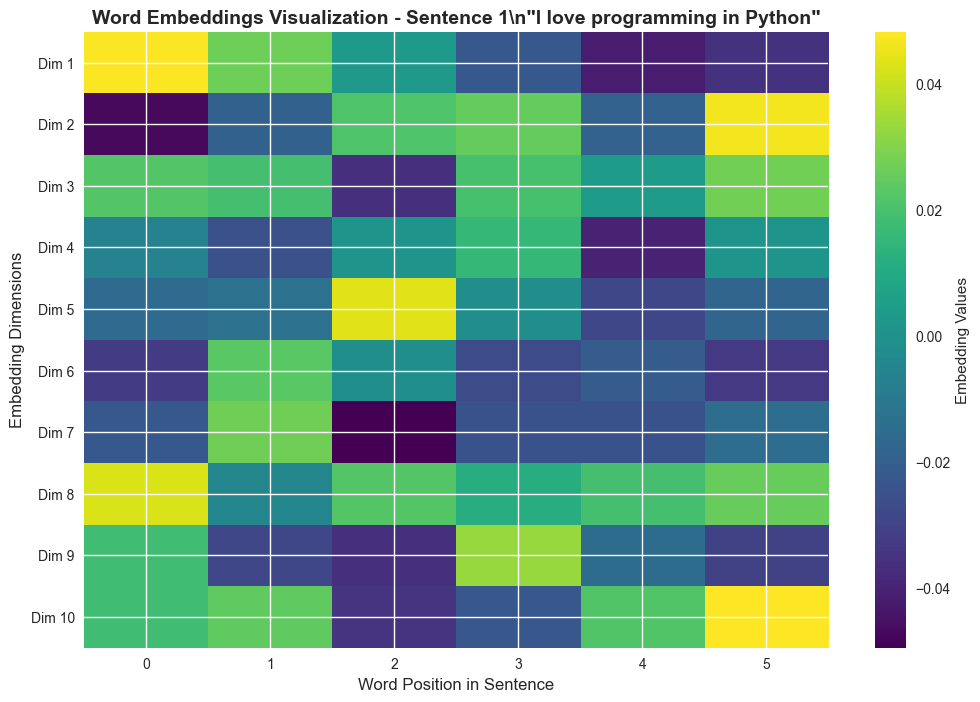

Embedding statistics for sentence 1:
Mean: -0.0021
Std: 0.0272
Min: -0.0495
Max: 0.0484


array([[[ 0.0478019 , -0.04699948,  0.02211582, -0.00593961,
         -0.01512132, -0.03209313, -0.02236917,  0.0428671 ,
          0.01837665,  0.01816955],
        [ 0.02682875, -0.01901837,  0.01951143, -0.02519685,
         -0.01257666,  0.02321572,  0.02695793, -0.00464923,
         -0.02876595,  0.02459624],
        [ 0.00359274,  0.02148601, -0.03646544,  0.00120445,
          0.04397349, -0.00057682, -0.04947935,  0.02219517,
         -0.03597118, -0.03454613],
        [-0.02247486,  0.02540675,  0.01981976,  0.01580067,
         -0.00115107, -0.02694547, -0.02497792,  0.01147474,
          0.0334033 , -0.02273858],
        [-0.0418406 , -0.01878396,  0.00466802, -0.04010063,
         -0.02859652, -0.02110435, -0.02497227,  0.01968959,
         -0.01475483,  0.0216977 ],
        [-0.03529496,  0.04673653,  0.02742053,  0.00115676,
         -0.01738731, -0.03309872, -0.01458919,  0.02580917,
         -0.03032155,  0.04835856]],

       [[-0.03529496,  0.04673653,  0.02742053,  0

In [16]:
# Generate embeddings and analyze the output
embeddings = model.predict(embedded_doc)

print("Embedding generation complete!")
print(f"Input shape: {embedded_doc.shape}")
print(f"Output shape: {embeddings.shape}")
print(f"Each word is now represented by a {dim}-dimensional vector\\n")

# Visualize embeddings for the first sentence
def visualize_embeddings(embeddings, sentence_idx=0, save_plot=True):
    """Visualize word embeddings for a specific sentence"""
    sentence_embedding = embeddings[sentence_idx]
    
    plt.figure(figsize=(12, 8))
    plt.imshow(sentence_embedding.T, cmap='viridis', aspect='auto')
    plt.colorbar(label='Embedding Values')
    plt.title(f'Word Embeddings Visualization - Sentence {sentence_idx + 1}\\n"{sent[sentence_idx]}"', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Word Position in Sentence', fontsize=12)
    plt.ylabel('Embedding Dimensions', fontsize=12)
    plt.yticks(range(dim), [f'Dim {i+1}' for i in range(dim)])
    
    if save_plot:
        plt.savefig('plots/word_embeddings_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print embedding statistics
    print(f"Embedding statistics for sentence {sentence_idx + 1}:")
    print(f"Mean: {sentence_embedding.mean():.4f}")
    print(f"Std: {sentence_embedding.std():.4f}")
    print(f"Min: {sentence_embedding.min():.4f}")
    print(f"Max: {sentence_embedding.max():.4f}")

# Visualize embeddings
visualize_embeddings(embeddings, sentence_idx=0)

embeddings

In [17]:
# Summary and Key Takeaways
print("\\n" + "="*60)
print("           EMBEDDING TUTORIAL SUMMARY")
print("="*60)
print("\\n✅ Successfully demonstrated:")
print("   • One-hot encoding of text data")
print("   • Sequence padding for uniform input length")
print("   • Word embedding layer creation")
print("   • Dense vector representation generation")
print("\\n🎯 Key Concepts Learned:")
print("   • Word embeddings create dense, learnable representations")
print("   • Padding ensures uniform sequence lengths")
print("   • Embedding dimensions control representation complexity")
print("   • Embeddings can capture semantic word relationships")
print("\\n📈 Next Steps:")
print("   • Use these embeddings in RNN/LSTM models")
print("   • Train on larger datasets for better representations")
print("   • Experiment with different embedding dimensions")
print("   • Apply to real NLP tasks like sentiment analysis")
print("\\n💾 Generated Files:")
print("   • plots/one_hot_encoding_analysis.png")
print("   • plots/word_embeddings_heatmap.png")
print("="*60)

\n============================================================
           EMBEDDING TUTORIAL SUMMARY
\n✅ Successfully demonstrated:
   • One-hot encoding of text data
   • Sequence padding for uniform input length
   • Word embedding layer creation
   • Dense vector representation generation
\n🎯 Key Concepts Learned:
   • Word embeddings create dense, learnable representations
   • Padding ensures uniform sequence lengths
   • Embedding dimensions control representation complexity
   • Embeddings can capture semantic word relationships
\n📈 Next Steps:
   • Use these embeddings in RNN/LSTM models
   • Train on larger datasets for better representations
   • Experiment with different embedding dimensions
   • Apply to real NLP tasks like sentiment analysis
\n💾 Generated Files:
   • plots/one_hot_encoding_analysis.png
   • plots/word_embeddings_heatmap.png
